In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


In [2]:
esport = pd.read_csv('ESport_Earnings.csv', error_bad_lines=False,
                    engine="python", sep=',',encoding='latin-1')
esport.head()

,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
0,613,310.00,Acceleration of SUGURI 2,Fighting Game,6,2,United States,310.00,2018
1,510,190075.61,Age of Empires,Strategy,246,95,Viet Nam,123408.43,1997
2,179,1492489.51,Age of Empires II,Strategy,956,576,China,174252.44,1999
3,177,68113.85,Age of Empires III,Strategy,106,76,United States,18523.52,2005
4,540,2668.00,Age of Empires Online,Strategy,16,7,Germany,1264.00,2011


In [3]:
esport.shape

(504, 9)

In [4]:
esport.isnull().sum()

IdNo                    0
TotalMoney              0
GameName                0
Genre                   0
PlayerNo                0
TournamentNo            0
Top_Country             0
Top_Country_Earnings    0
Releaseyear             0
dtype: int64

In [5]:
esport.duplicated().sum()

0

In [6]:
esport.columns

Index(['IdNo', 'TotalMoney', 'GameName', 'Genre', 'PlayerNo', 'TournamentNo',
       'Top_Country', 'Top_Country_Earnings', 'Releaseyear'],
      dtype='object')

In [7]:
esport.describe()

,IdNo,TotalMoney,PlayerNo,TournamentNo,Top_Country_Earnings,Releaseyear
count,504.000000,5.040000e+02,504.000000,504.000000,5.040000e+02,504.000000
mean,440.972222,1.744743e+06,186.738095,80.746032,6.010823e+05,2006.982143
std,163.464867,1.269146e+07,795.779782,412.460699,3.751800e+06,89.354220
min,151.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,11.000000
25%,276.750000,1.375202e+03,4.000000,1.000000,3.913000e+02,2006.000000
50%,454.500000,3.600856e+04,20.000000,5.000000,1.711679e+04,2013.000000
75%,580.250000,2.057516e+05,86.000000,25.250000,1.036039e+05,2017.000000
max,706.000000,2.274199e+08,13032.000000,5909.000000,6.506061e+07,2020.000000


In [8]:
esport = esport.drop(esport[esport['Releaseyear'] < 2006].index)
esport.shape

(383, 9)

In [9]:
esport.describe()

,IdNo,TotalMoney,PlayerNo,TournamentNo,Top_Country_Earnings,Releaseyear
count,383.000000,3.830000e+02,383.000000,383.000000,3.830000e+02,383.000000
mean,464.339426,2.160037e+06,209.736292,86.002611,7.290043e+05,2014.093995
std,147.789133,1.451016e+07,877.203327,444.873289,4.273774e+06,4.109947
min,151.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,2006.000000
25%,363.500000,1.645980e+03,5.000000,1.000000,6.339750e+02,2011.000000
50%,476.000000,3.983000e+04,28.000000,6.000000,1.776700e+04,2015.000000
75%,582.500000,2.712696e+05,100.500000,33.500000,1.372002e+05,2017.500000
max,706.000000,2.274199e+08,13032.000000,5909.000000,6.506061e+07,2020.000000


In [10]:
esport['Genre'].value_counts()

Fighting Game                      115
First-Person Shooter                78
Sports                              52
Strategy                            38
Racing                              37
Multiplayer Online Battle Arena     20
Collectible Card Game               12
Battle Royale                       11
Puzzle Game                         10
Third-Person Shooter                 7
Role-Playing Game                    3
Name: Genre, dtype: int64

In [11]:
highest_prize_money = esport.groupby('GameName')['TotalMoney'].sum().sort_values(ascending=False).head(1)
print("The game with the highest total prize money is:", highest_prize_money.index[0])

The game with the highest total prize money is: Dota 2


In [12]:
genre_prize_money = esport.groupby('Genre')['TotalMoney'].sum().sort_values(ascending=False)
print("Total prize money by genre:\n", genre_prize_money)

Total prize money by genre:
 Genre
Multiplayer Online Battle Arena    3.534418e+08
First-Person Shooter               2.053014e+08
Battle Royale                      1.329225e+08
Strategy                           4.836702e+07
Collectible Card Game              3.305340e+07
Sports                             2.551599e+07
Fighting Game                      1.615231e+07
Racing                             6.662054e+06
Third-Person Shooter               4.901986e+06
Role-Playing Game                  9.527597e+05
Puzzle Game                        2.282659e+04
Name: TotalMoney, dtype: float64


In [13]:
most_players = esport.groupby('GameName')['PlayerNo'].sum().sort_values(ascending=False).head(1)
most_tournaments = esport.groupby('GameName')['TournamentNo'].sum().sort_values(ascending=False).head(1)
print("The game with the most players is:", most_players.index[0])
print("The game with the most tournaments is:", most_tournaments.index[0])

The game with the most players is: Counter-Strike: Global Offensive
The game with the most tournaments is: StarCraft II


In [15]:
import seaborn as sns

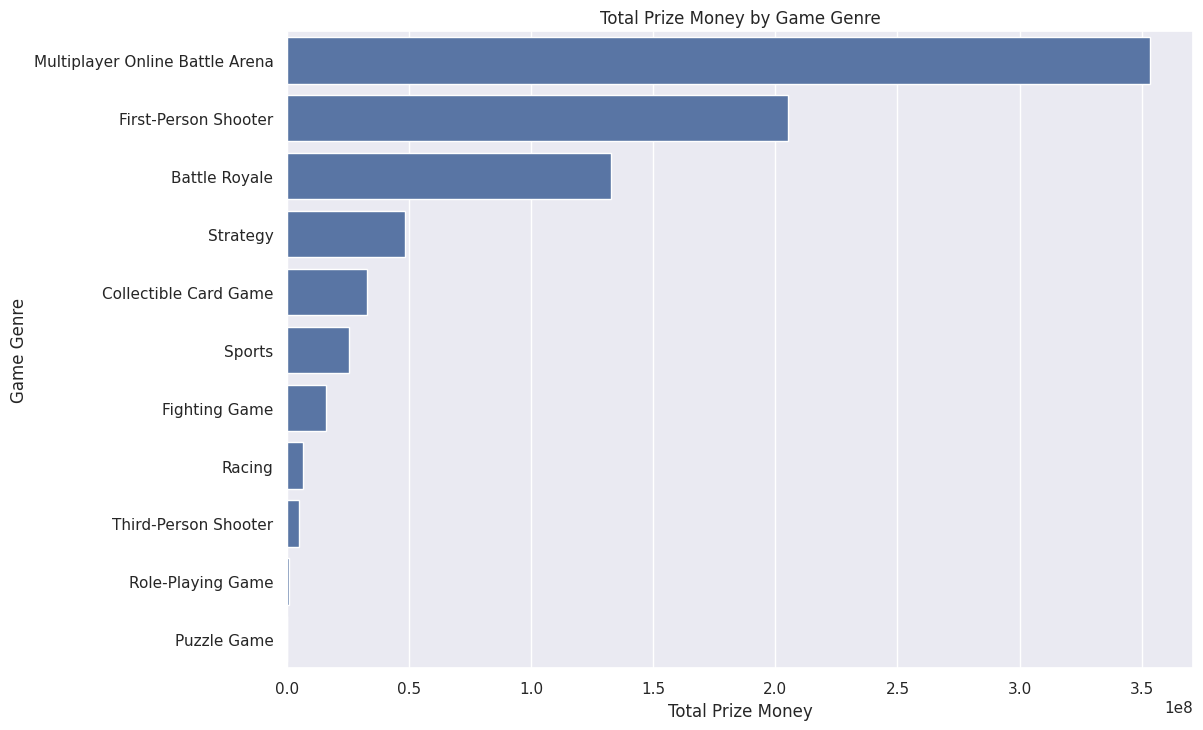

In [16]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

genre_order = esport.groupby(['Genre'])['TotalMoney'].sum().sort_values(ascending=False).index
sns.barplot(x="TotalMoney", y="Genre", data=esport, estimator=sum, ci=None, order=genre_order)
plt.title('Total Prize Money by Game Genre')
plt.xlabel('Total Prize Money')
plt.ylabel('Game Genre')
plt.show()


In [17]:
year_prize_money = esport.groupby('Releaseyear')['TotalMoney'].sum().sort_values(ascending=False)

print(year_prize_money.head(15))

Releaseyear
2013    2.333863e+08
2017    1.393286e+08
2012    1.085794e+08
2009    7.927659e+07
2015    7.231075e+07
2016    4.906946e+07
2010    4.394318e+07
2014    3.945012e+07
2018    2.213570e+07
2019    1.733711e+07
2007    1.202871e+07
2020    4.488063e+06
2008    2.914646e+06
2011    2.003740e+06
2006    1.041683e+06
Name: TotalMoney, dtype: float64


In [18]:
year_players = esport.groupby('Releaseyear')['PlayerNo'].sum()

print(year_players.head(15))

Releaseyear
2006      277
2007     4518
2008     1809
2009     7335
2010     5100
2011      909
2012    14081
2013     5693
2014     6111
2015     7500
2016     6434
2017    10332
2018     4344
2019     2770
2020     3116
Name: PlayerNo, dtype: int64


In [19]:
year_tournaments = esport.groupby('Releaseyear')['TournamentNo'].sum()

print(year_tournaments.head(15))

Releaseyear
2006      66
2007     911
2008     603
2009    2567
2010    7605
2011     550
2012    5633
2013    2402
2014    3198
2015    3093
2016    1713
2017    1750
2018    1898
2019     462
2020     488
Name: TournamentNo, dtype: int64


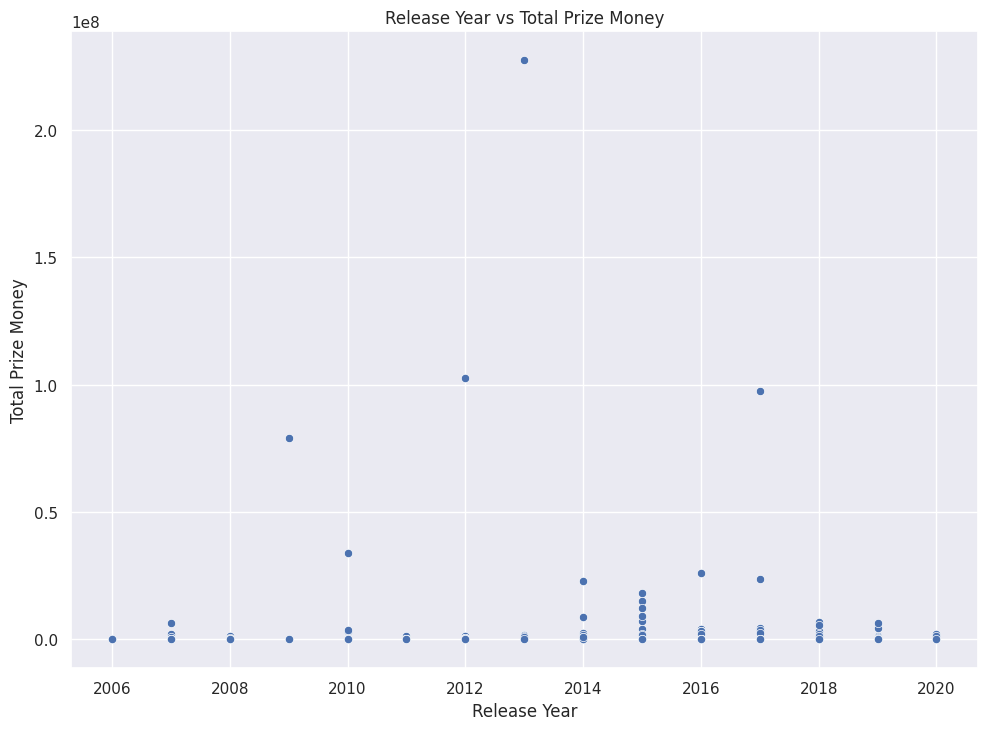

In [20]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(x="Releaseyear", y="TotalMoney", data=esport)
plt.title('Release Year vs Total Prize Money')
plt.xlabel('Release Year')
plt.ylabel('Total Prize Money')
plt.show()

In [21]:
# Which country has the highest earnings in esports?
highest_earnings = esport.groupby('Top_Country')['Top_Country_Earnings'].sum().sort_values(ascending=False).head(1)
print("The country with the highest earnings in esports is:", highest_earnings.index[0])

The country with the highest earnings in esports is: United States


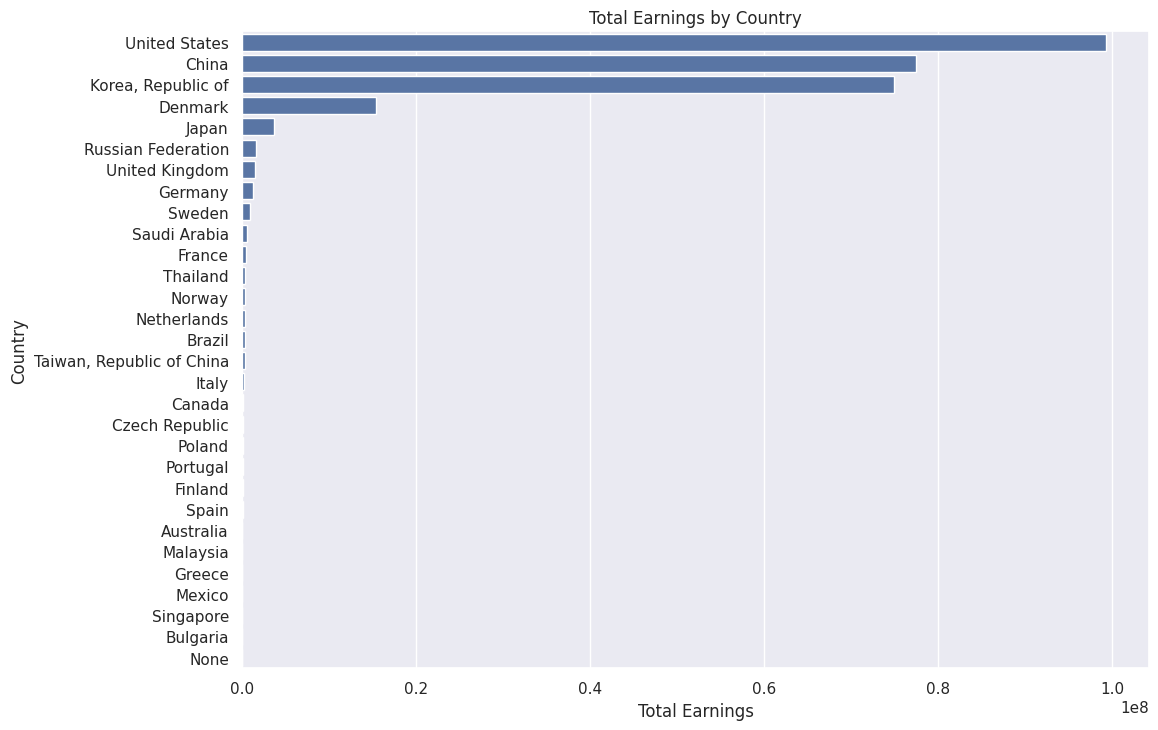

In [22]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create a horizontal bar chart of total earnings by country with bars in descending order
country_order = esport.groupby(['Top_Country'])['Top_Country_Earnings'].sum().sort_values(ascending=False).index
sns.barplot(x="Top_Country_Earnings", y="Top_Country", data=esport, estimator=sum, ci=None, order=country_order)
plt.title('Total Earnings by Country')
plt.xlabel('Total Earnings')
plt.ylabel('Country')
plt.show()

In [23]:
# How does the earnings of the top countries vary across different game genres?
genre_earnings = esport.groupby(['Genre', 'Top_Country'])['Top_Country_Earnings'].sum().sort_values(ascending=False)
print("Total earnings by genre and country:\n", genre_earnings)

Total earnings by genre and country:
 Genre                            Top_Country       
Multiplayer Online Battle Arena  China                 70077493.78
First-Person Shooter             United States         38944058.34
Battle Royale                    United States         36909310.86
Multiplayer Online Battle Arena  Korea, Republic of    32782359.83
Strategy                         Korea, Republic of    21190456.39
                                                          ...     
                                 None                         0.00
First-Person Shooter             None                         0.00
Sports                           None                         0.00
Racing                           None                         0.00
Multiplayer Online Battle Arena  None                         0.00
Name: Top_Country_Earnings, Length: 99, dtype: float64


In [24]:
# How does the number of players and tournaments affect the earnings of the top countries?
country_players = esport.groupby('Top_Country')['PlayerNo'].sum().sort_values(ascending=False)

print(country_players.head(10))

Top_Country
United States         31486
Korea, Republic of    17750
Denmark               13097
China                  9000
Japan                  1760
United Kingdom         1281
Germany                1192
France                 1044
Sweden                 1022
Russian Federation      935
Name: PlayerNo, dtype: int64


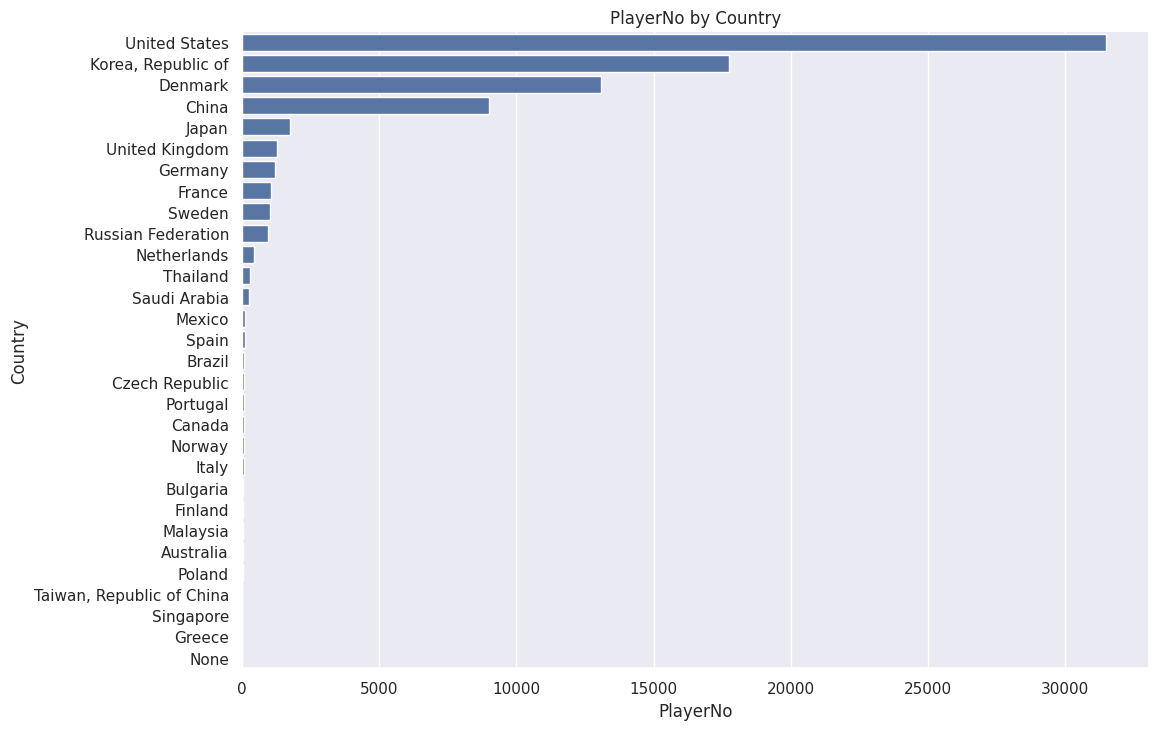

In [25]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create a horizontal bar chart of total earnings by country with bars in descending order
country_order = esport.groupby(['Top_Country'])['PlayerNo'].sum().sort_values(ascending=False).index
sns.barplot(x="PlayerNo", y="Top_Country", data=esport, estimator=sum, ci=None, order=country_order)
plt.title('PlayerNo by Country')
plt.xlabel('PlayerNo')
plt.ylabel('Country')
plt.show()

In [26]:
# How does the number of players and tournaments affect the earnings of the top countries?
country_tournaments = esport.groupby('Top_Country')['TournamentNo'].sum().sort_values(ascending=False)

print(country_tournaments.head(10))

Top_Country
United States         10454
Korea, Republic of    10392
Denmark                5330
China                  2973
France                 1011
Japan                   933
Sweden                  520
Germany                 370
United Kingdom          279
Russian Federation      151
Name: TournamentNo, dtype: int64


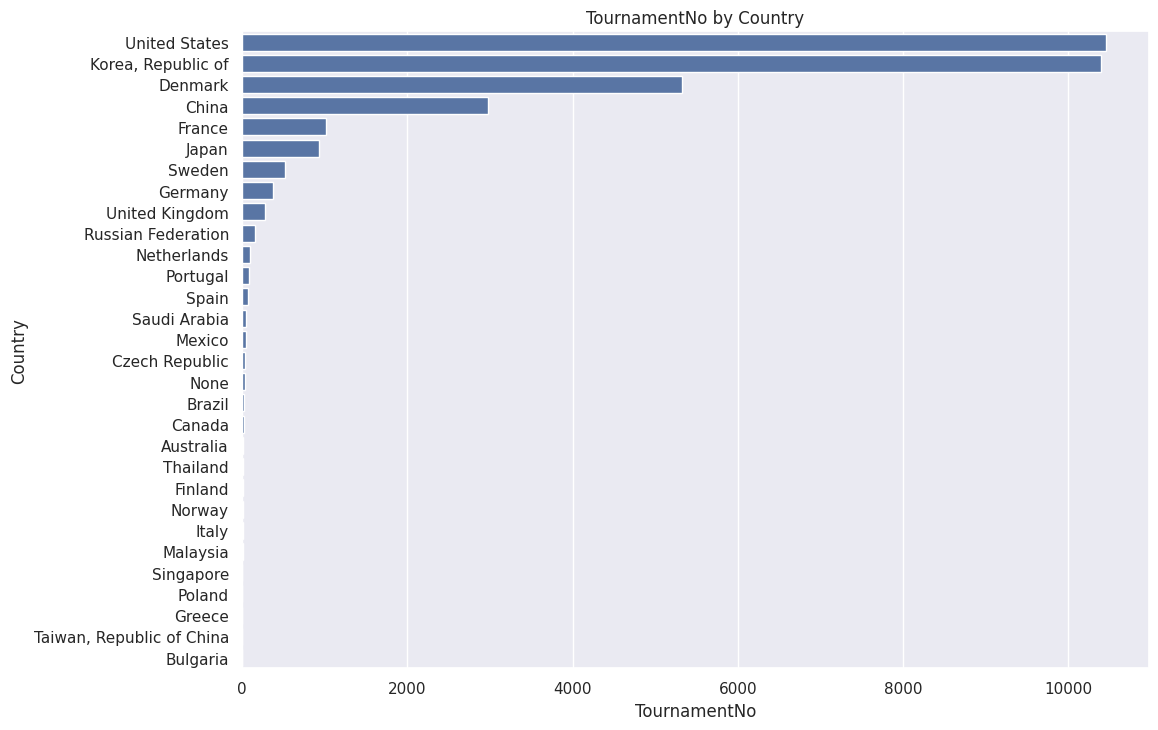

In [27]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create a horizontal bar chart of total earnings by country with bars in descending order
country_order = esport.groupby(['Top_Country'])['TournamentNo'].sum().sort_values(ascending=False).index
sns.barplot(x="TournamentNo", y="Top_Country", data=esport, estimator=sum, ci=None, order=country_order)
plt.title('TournamentNo by Country')
plt.xlabel('TournamentNo')
plt.ylabel('Country')
plt.show()

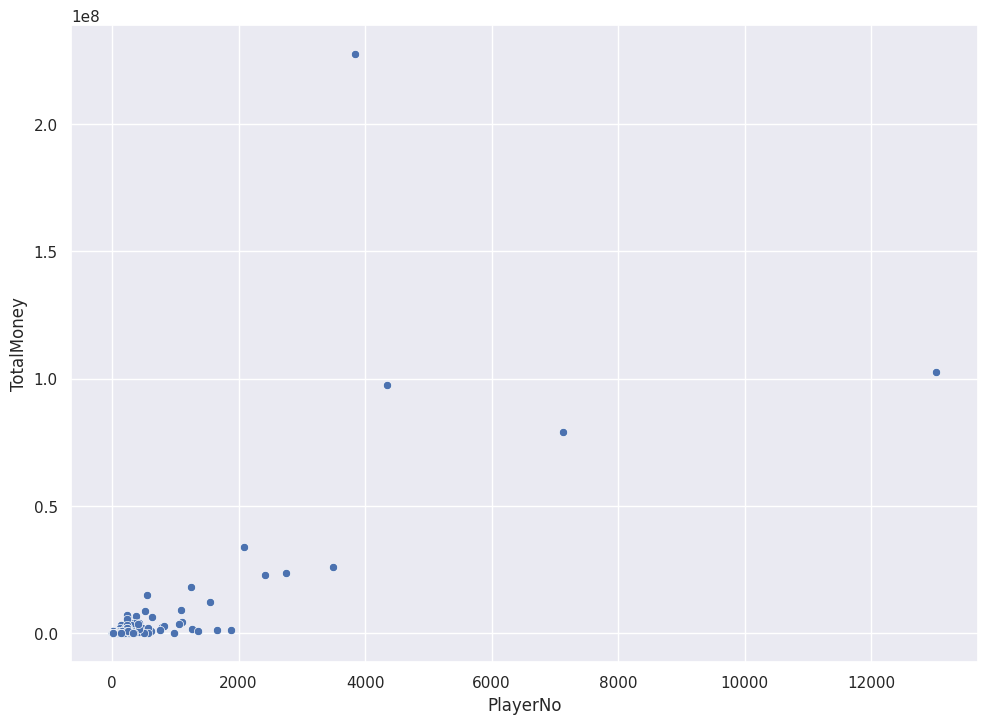

In [28]:
# Is there a correlation between the number of players and the total prize money of a tournament?
sns.scatterplot(x='PlayerNo', y='TotalMoney', data=esport)
plt.show()


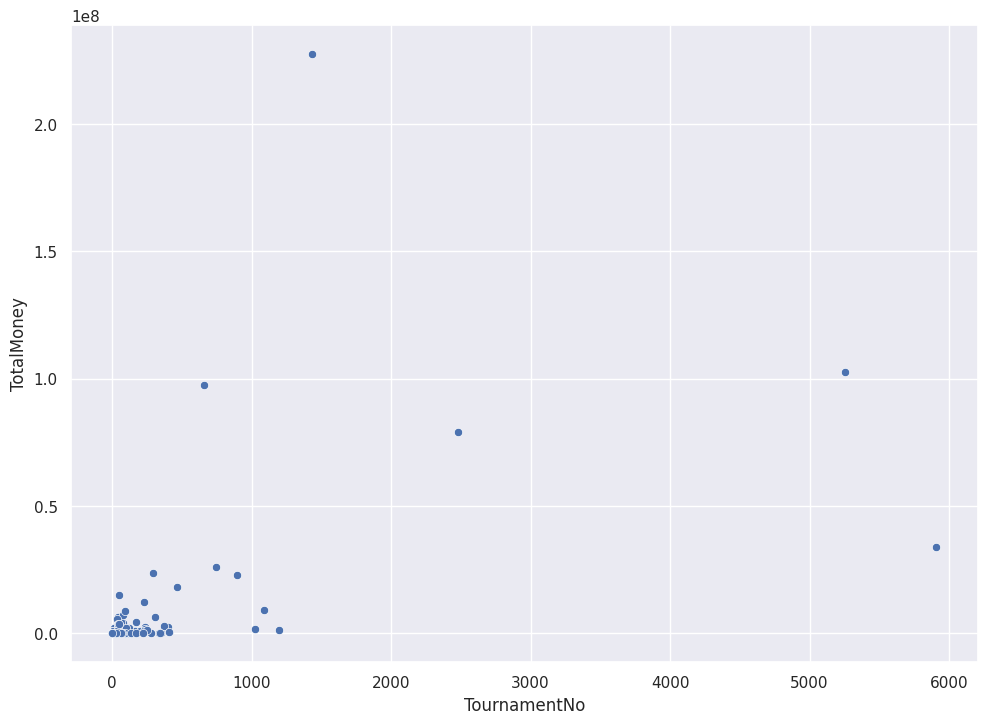

In [29]:
# Is there a correlation between the number of tournaments and the total prize money of a game?
sns.scatterplot(x='TournamentNo', y='TotalMoney', data=esport)
plt.show()

In [30]:
# How does the number of players and tournaments affect the prize money distribution across different game genres?
genre_players = esport.groupby('Genre')['PlayerNo'].sum().sort_values(ascending=False)
print(genre_players.head(10))

Genre
First-Person Shooter               29626
Multiplayer Online Battle Arena    15007
Battle Royale                       9947
Fighting Game                       9825
Strategy                            5718
Collectible Card Game               3913
Sports                              3282
Racing                              2245
Third-Person Shooter                 400
Role-Playing Game                    274
Name: PlayerNo, dtype: int64


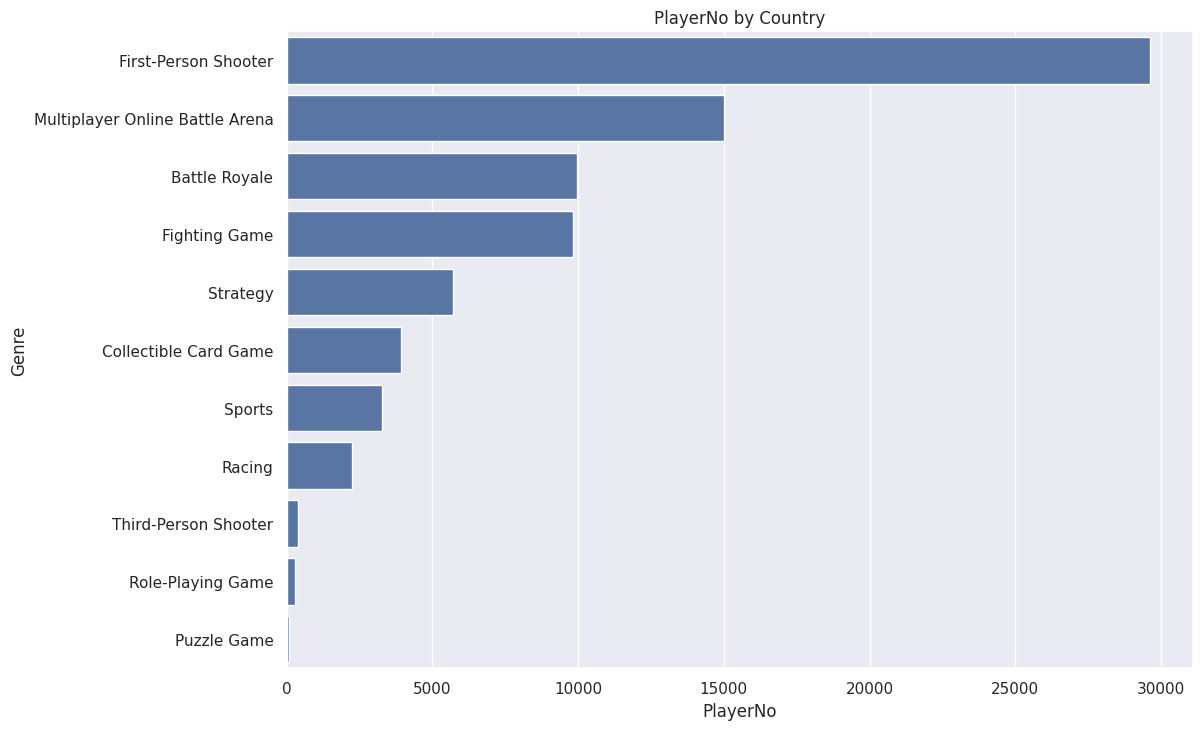

In [31]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create a horizontal bar chart of total earnings by country with bars in descending order
country_order = esport.groupby(['Genre'])['PlayerNo'].sum().sort_values(ascending=False).index
sns.barplot(x="PlayerNo", y="Genre", data=esport, estimator=sum, ci=None, order=country_order)
plt.title('PlayerNo by Country')
plt.xlabel('PlayerNo')
plt.ylabel('Genre')
plt.show()

In [32]:
# How does the number of players and tournaments affect the prize money distribution across different game genres?
genre_tournaments = esport.groupby('Genre')['TournamentNo'].sum().sort_values(ascending=False)

print(genre_tournaments.head(10))

Genre
First-Person Shooter               9511
Strategy                           6547
Fighting Game                      5944
Multiplayer Online Battle Arena    5043
Sports                             2120
Collectible Card Game              1521
Battle Royale                      1203
Racing                              835
Third-Person Shooter                 91
Role-Playing Game                    81
Name: TournamentNo, dtype: int64


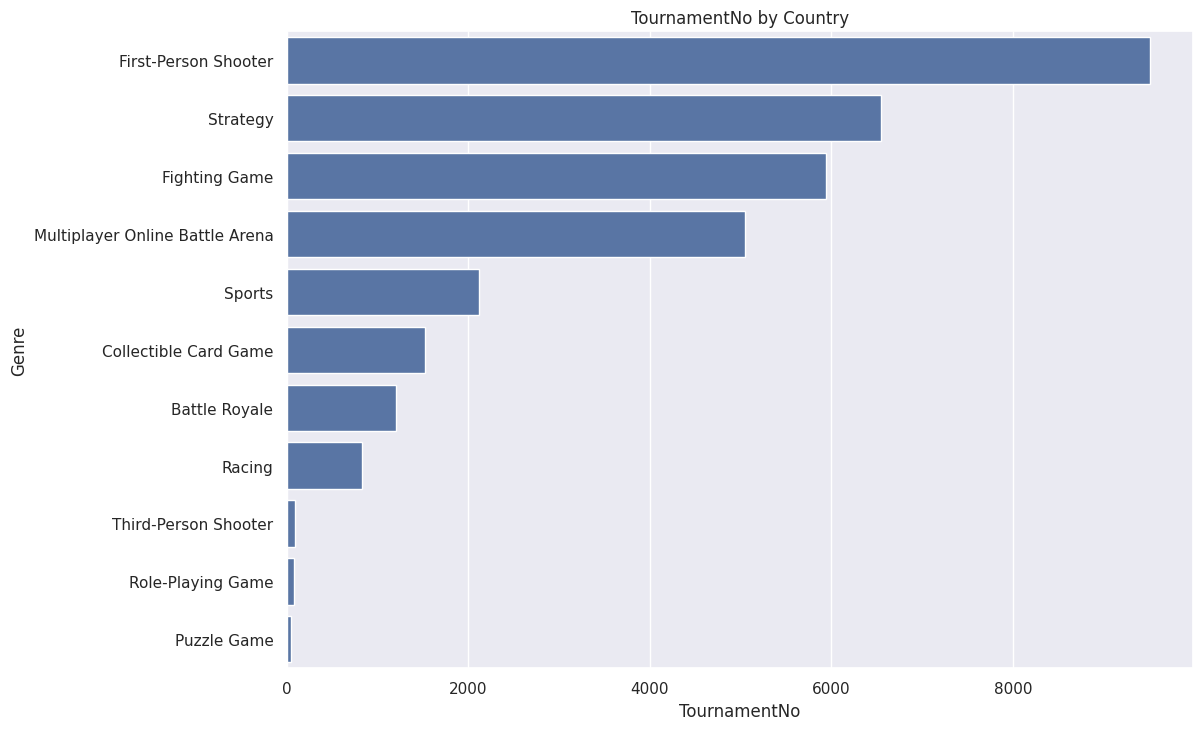

In [33]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create a horizontal bar chart of total earnings by country with bars in descending order
country_order = esport.groupby(['Genre'])['TournamentNo'].sum().sort_values(ascending=False).index
sns.barplot(x="TournamentNo", y="Genre", data=esport, estimator=sum, ci=None, order=country_order)
plt.title('TournamentNo by Country')
plt.xlabel('TournamentNo')
plt.ylabel('Genre')
plt.show()

In [34]:
# How does the number of players and tournaments affect the prize money distribution across different game genres?
genre_total_money = esport.groupby('Genre')['TotalMoney'].sum().sort_values(ascending=False)

print(genre_total_money.head(10))

Genre
Multiplayer Online Battle Arena    3.534418e+08
First-Person Shooter               2.053014e+08
Battle Royale                      1.329225e+08
Strategy                           4.836702e+07
Collectible Card Game              3.305340e+07
Sports                             2.551599e+07
Fighting Game                      1.615231e+07
Racing                             6.662054e+06
Third-Person Shooter               4.901986e+06
Role-Playing Game                  9.527597e+05
Name: TotalMoney, dtype: float64


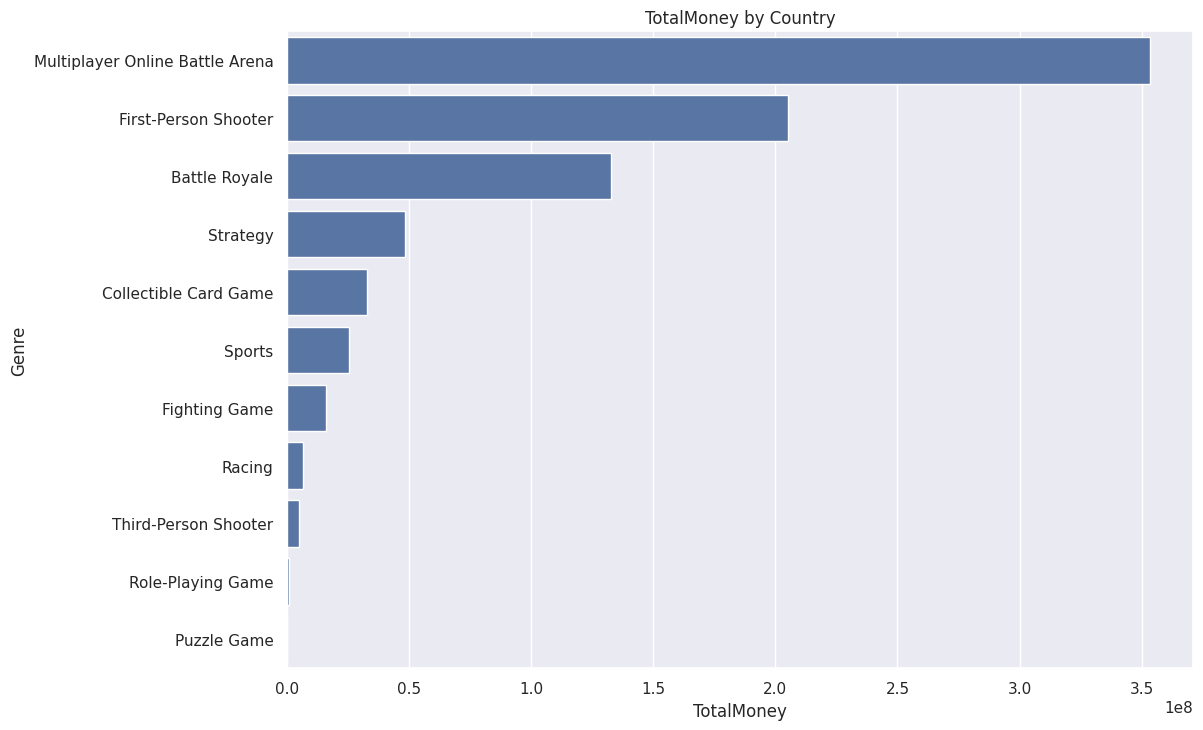

In [35]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create a horizontal bar chart of total earnings by country with bars in descending order
country_order = esport.groupby(['Genre'])['TotalMoney'].sum().sort_values(ascending=False).index
sns.barplot(x="TotalMoney", y="Genre", data=esport, estimator=sum, ci=None, order=country_order)
plt.title('TotalMoney by Country')
plt.xlabel('TotalMoney')
plt.ylabel('Genre')
plt.show()

In [36]:
# Which player has earned the most money in esports?
highest_earnings_player = esport.groupby('IdNo')['TotalMoney'].sum()

print(highest_earnings_player.head())

IdNo
151    33914062.96
155     2158079.40
156      822089.97
157      682294.04
164    79003448.94
Name: TotalMoney, dtype: float64


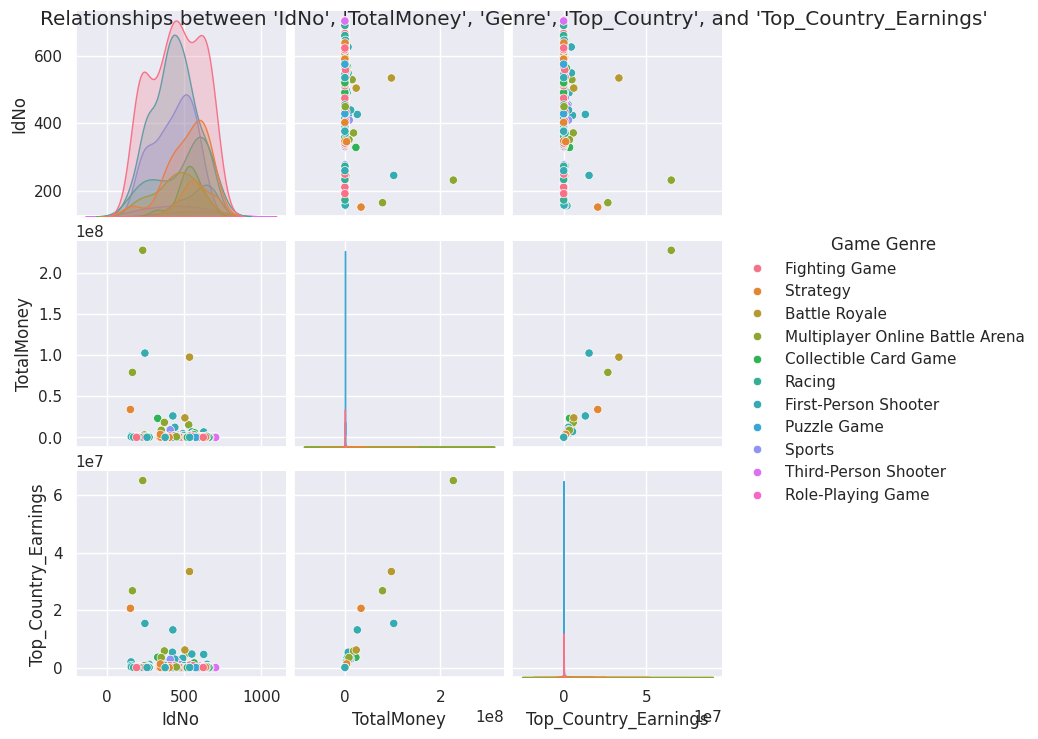

In [37]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create a scatter plot matrix of selected variables with title and legend
selected_vars = esport[['IdNo', 'TotalMoney', 'Genre', 'Top_Country', 'Top_Country_Earnings']]
scatter_plot = sns.pairplot(selected_vars, hue='Genre')
scatter_plot.fig.suptitle("Relationships between 'IdNo', 'TotalMoney', 'Genre', 'Top_Country', and 'Top_Country_Earnings'")
scatter_plot._legend.set_title("Game Genre")
plt.show()


Conclusion
The game with the highest total prize money is: Dota 2

The game genre with the highest prize money is Multiplayer Online Battle Arena.

The game with the most players is: Counter-Strike: Global Offensive

The game with the most tournaments is: StarCraft II

The release year with the highest total prize money way 2013 followed by 2017, 2012 and the least being 2006.

The country with the highest earnings in esports is: United States

Differnt genre varies in different country. for example:

 a. Multiplayer Online Battle Arena is top genre esport in  China,    
 b. First-Person Shooter in  United States  tying with Battle Royale ,
 c. Multiplayer Online Battle Arena in  Republic of Korea tying with Strategy      
There is a linear relationship between number of players and total money.